# Telco Customer Churn Analysis

## Business Context
Customer churn is a critical challenge for telecom companies, as acquiring new customers is significantly more expensive than retaining existing ones. Understanding customer behavior, service usage, and billing patterns can help identify churn risks early and improve retention strategies.

This project performs an exploratory data analysis (EDA) on a telecom customer dataset to uncover key factors influencing customer churn and provide actionable business insights.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (7, 4)


## Dataset Overview

The dataset contains customer-level information from a telecom company, including demographic details, subscribed services, contract types, billing information, and churn status.

- **Total Records:** ~7,000 customers
- **Target Variable:** Churn (Yes / No)
- **Key Feature Groups:**
  - Demographics (gender, senior citizen, dependents)
  - Services (internet, security, streaming)
  - Contract & billing (contract type, charges, payment method)


In [2]:
df = pd.read_csv("telco_customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Initial Data Inspection

Before analysis, it is important to understand the dataset structure, data types, and presence of missing values.


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data Cleaning & Preparation

The dataset requires minor preprocessing to ensure accurate analysis:
- Convert total charges to numeric format
- Handle missing values
- Prepare categorical and target variables


In [5]:
# Convert TotalCharges to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Remove rows with missing TotalCharges
df.dropna(subset=["TotalCharges"], inplace=True)

# Convert SeniorCitizen to categorical type
df["SeniorCitizen"] = df["SeniorCitizen"].astype("category")

## Target Variable Encoding

To enable numerical analysis and KPI calculation, the churn variable is encoded as:
- **1** → Customer churned
- **0** → Customer retained


In [6]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

## Key Metric: Overall Churn Rate

The churn rate represents the percentage of customers who discontinued service during the observed period.


In [7]:
churn_rate = df["Churn"].mean() * 100
print(f"Overall Churn Rate: {churn_rate:.2f}%")


Overall Churn Rate: 26.58%


## Churn Distribution

This section examines the overall distribution of churned versus retained customers.


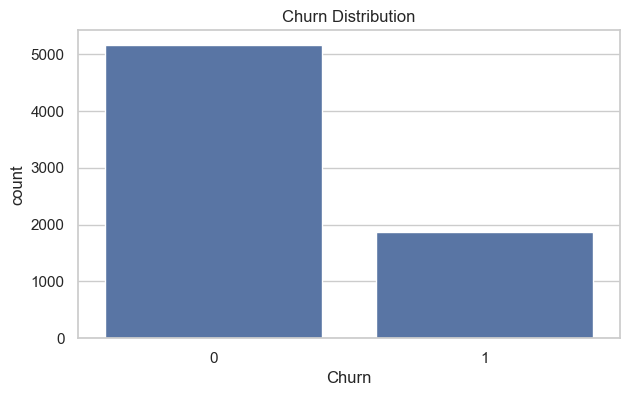

In [8]:
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()

## Customer Tenure vs Churn

Customer tenure is a strong indicator of churn behavior. Shorter-tenure customers are generally more likely to churn.


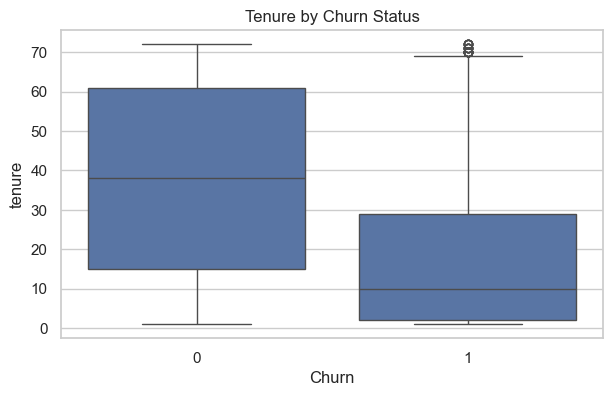

In [9]:
df.groupby("Churn")["tenure"].mean()
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tenure by Churn Status")
plt.show()

## Billing Analysis

This analysis evaluates how monthly and total charges influence customer churn.


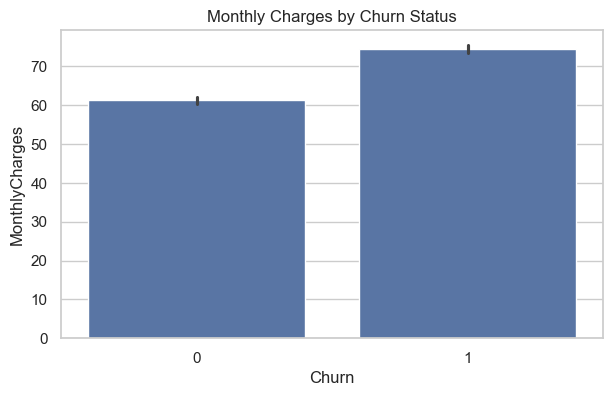

In [10]:
df.groupby("Churn")[["MonthlyCharges", "TotalCharges"]].mean()
sns.barplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges by Churn Status")
plt.show()

## Contract Type & Churn

Contract duration significantly affects customer retention, with shorter contracts typically showing higher churn.


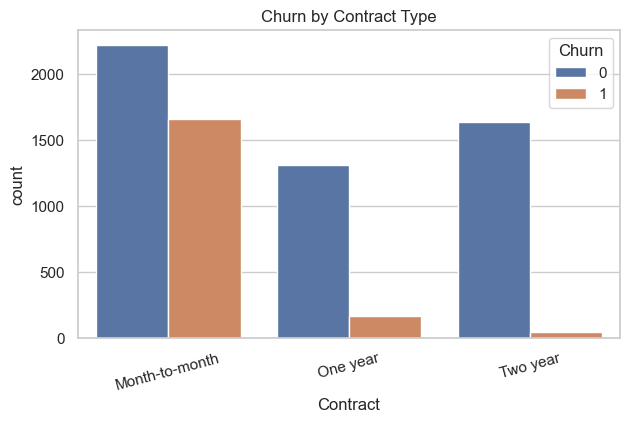

In [11]:
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Churn by Contract Type")
plt.xticks(rotation=15)
plt.show()

## Service-Based Churn Analysis

This section analyzes how different services impact churn behavior.


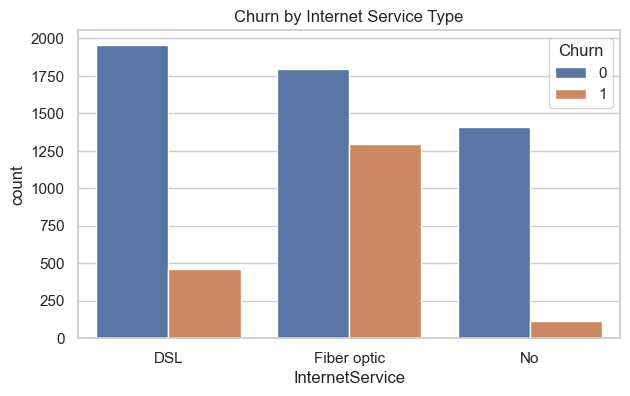

In [12]:
sns.countplot(x="InternetService", hue="Churn", data=df)
plt.title("Churn by Internet Service Type")
plt.show()

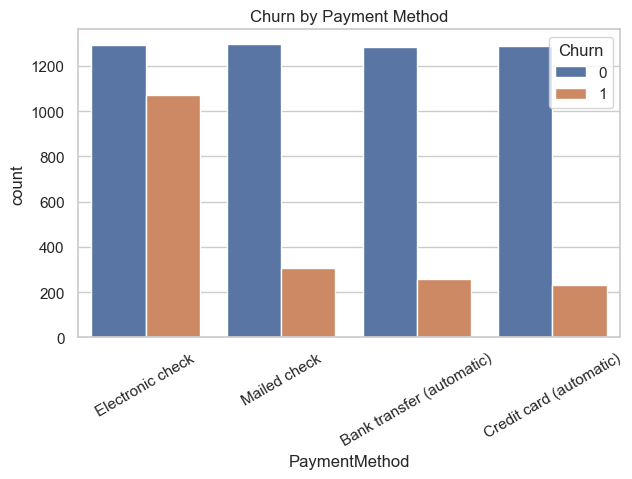

In [13]:
sns.countplot(x="PaymentMethod", hue="Churn", data=df)
plt.title("Churn by Payment Method")
plt.xticks(rotation=30)
plt.show()

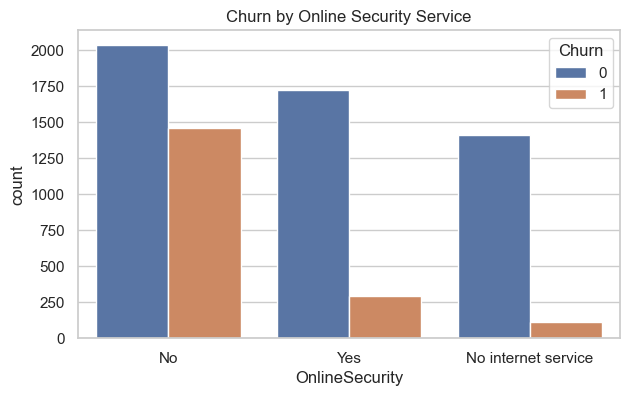

In [14]:
sns.countplot(x="OnlineSecurity", hue="Churn", data=df)
plt.title("Churn by Online Security Service")
plt.show()

## Correlation Analysis

Correlation analysis helps identify numeric features that are strongly associated with churn.


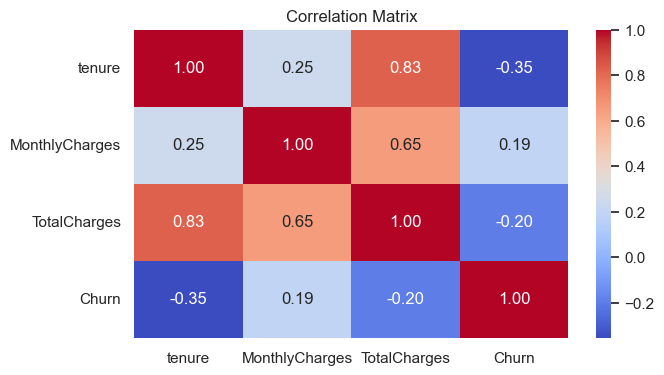

In [15]:
numeric_df = df.select_dtypes(include=["int64", "float64"])

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## Key Insights

- Month-to-month contracts exhibit the highest churn rates.
- Customers with shorter tenure are significantly more likely to churn.
- Higher monthly charges correlate with increased churn risk.
- Customers without online security services churn more frequently.


## Business Recommendations

- Encourage long-term contracts through pricing incentives.
- Bundle online security and technical support services.
- Identify high-risk customers early using tenure and billing patterns.


## Conclusion & Next Steps

This exploratory analysis highlights critical drivers of customer churn in the telecom domain. These insights can support targeted retention strategies and serve as a foundation for predictive modeling.

### Next Steps
- Develop churn prediction models (Logistic Regression, Random Forest)
- Evaluate model performance using ROC-AUC
- Deploy insights via dashboards for business stakeholders
